In [1]:

import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout

In [2]:
width=128
height=128
target_size=(width,height)
channels=3
input_shape=(width,height,channels)
batch_size=200
epochs=10

In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [5]:
train_dir = 'C:\\Users\Administrator\\Documents\\Python\\10\\train'
test_dir = 'C:\\Users\Administrator\\Documents\\Python\\10\\test'

In [6]:
filenames=os.listdir(train_dir)

In [7]:
categories=[]
for name in filenames:
    category=name.split('.')[0]
    if category=='cat':
        categories.append('cat')
    else:
        categories.append('dog')

In [8]:
print(filenames[:5])
print(categories[:5])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
['cat', 'cat', 'cat', 'cat', 'cat']


In [9]:
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [10]:
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=69)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [11]:
trainLen = train_df.shape[0]
validLen = validate_df.shape[0]
print(str(trainLen)+'\n'+str(validLen))

20000
5000


In [12]:
train_df.head()

,filename,category
0,cat.1257.jpg,cat
1,dog.5119.jpg,dog
2,dog.167.jpg,dog
3,cat.9583.jpg,cat
4,dog.10896.jpg,dog


In [15]:
filenames2=os.listdir(test_dir)
test_df=pd.DataFrame({
    'filename':filenames2,
})
test_df.head()
testLen=test_df.shape[0]
print(testLen)

12500


In [16]:
width=128
height=128
target_size=(width,height)
channels=3
input_shape=(width,height,channels)
batch_size=200
epochs=10

# SETTTINGS

In [17]:
DataGenerator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=15,
    horizontal_flip=True)

In [18]:
trainGenerator = DataGenerator.flow_from_dataframe(
    train_df,
    './train',
    x_col='filename',
    y_col='category',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary')

Found 0 validated image filenames belonging to 0 classes.


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\keras\preprocessing\image.py:989: UserWarning: Found 20000 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


In [19]:
validDataGenerator = ImageDataGenerator(rescale=1./255)
validationGenerator = validDataGenerator.flow_from_dataframe(
    validate_df, 
    "./train", 
    x_col='filename',
    y_col='category',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary')

Found 0 validated image filenames belonging to 0 classes.


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\keras\preprocessing\image.py:989: UserWarning: Found 5000 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


In [20]:
testGenerator = validDataGenerator.flow_from_dataframe(
    test_df,
    test_dir,
    x_col='filename',
    target_size=target_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

Found 12500 validated image filenames.


In [21]:
from keras.models import Sequential

In [22]:
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

In [23]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

NameError: name 'Image_Width' is not defined

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        1

In [21]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

stop_early = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=2,
                        verbose=1,
                        factor=0.5,
                        min_lr=0.00001)

In [22]:
history = model.fit(
    trainGenerator,
    validation_data=validationGenerator,
    epochs=epochs,
    steps_per_epoch=trainLen//batch_size,
    validation_steps=validLen//batch_size,
    callbacks=[stop_early, lrr])

2022-01-24 17:55:18.194859: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2022-01-24 17:55:18.516417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.0039 - accuracy: 0.5473

2022-01-24 17:56:07.554296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 56s 534ms/step - loss: 1.0039 - accuracy: 0.5473 - val_loss: 1.0445 - val_accuracy: 0.5030 - lr: 0.0010
Epoch 2/30
100/100 [==============================] - 55s 549ms/step - loss: 0.6796 - accuracy: 0.5840 - val_loss: 1.0697 - val_accuracy: 0.5030 - lr: 0.0010
Epoch 3/30
100/100 [==============================] - 58s 574ms/step - loss: 0.6388 - accuracy: 0.6433 - val_loss: 0.8101 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 4/30
100/100 [==============================] - 61s 612ms/step - loss: 0.5879 - accuracy: 0.6914 - val_loss: 1.0494 - val_accuracy: 0.5128 - lr: 0.0010
Epoch 5/30
100/100 [==============================] - ETA: 0s - loss: 0.5485 - accuracy: 0.7253
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 [==============================] - 62s 615ms/step - loss: 0.5485 - accuracy: 0.7253 - val_loss: 1.2099 - val_accuracy: 0.5134 - lr: 0.0010
Epoch 6/30
100/100 [==============================] - 63

In [23]:
model.save("PATRYK_SICZEK_43225_MODEL.h5")

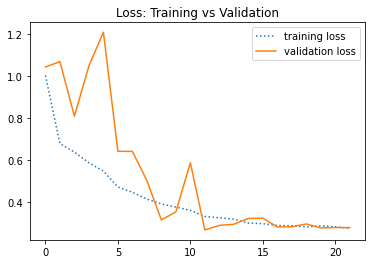

In [24]:
plt.plot(history.history['loss'], label='training loss', linestyle=':')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss: Training vs Validation')
plt.legend()
plt.show()

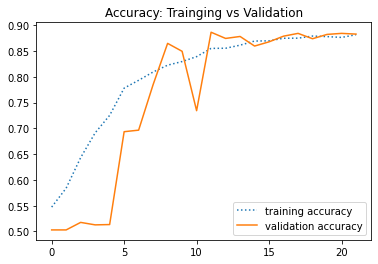

In [25]:
plt.plot(history.history['accuracy'], label='training accuracy', linestyle=':')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy: Trainging vs Validation')
plt.legend()
plt.show()

In [26]:
predict = model.predict_generator(testGenerator, steps=np.ceil(testLen/batch_size))

/var/folders/_9/54bp4ysn419f1cx_bx1r2qxc0000gn/T/ipykernel_10568/1854804748.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(testGenerator, steps=np.ceil(testLen/batch_size))
2022-01-24 18:17:44.439041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [27]:
predict

array([[2.30587181e-02],
       [3.09310883e-01],
       [9.00663733e-01],
       ...,
       [9.35448557e-02],
       [1.08897664e-04],
       [9.98415351e-01]], dtype=float32)

In [28]:
predictions=[]
for pred in predict:
    if pred>=0.5:
        predictions.append(1)
    else:
        predictions.append(0)

In [29]:
test_df['preds'] = predictions

In [33]:
sample_test = test_df[2580:2598]
sample_test

,filename,preds
2580,11402.jpg,0
2581,3145.jpg,1
2582,11364.jpg,0
2583,3623.jpg,1
2584,5252.jpg,0
2585,1034.jpg,1
2586,9468.jpg,0
2587,8776.jpg,0
2588,7445.jpg,0
2589,6983.jpg,0


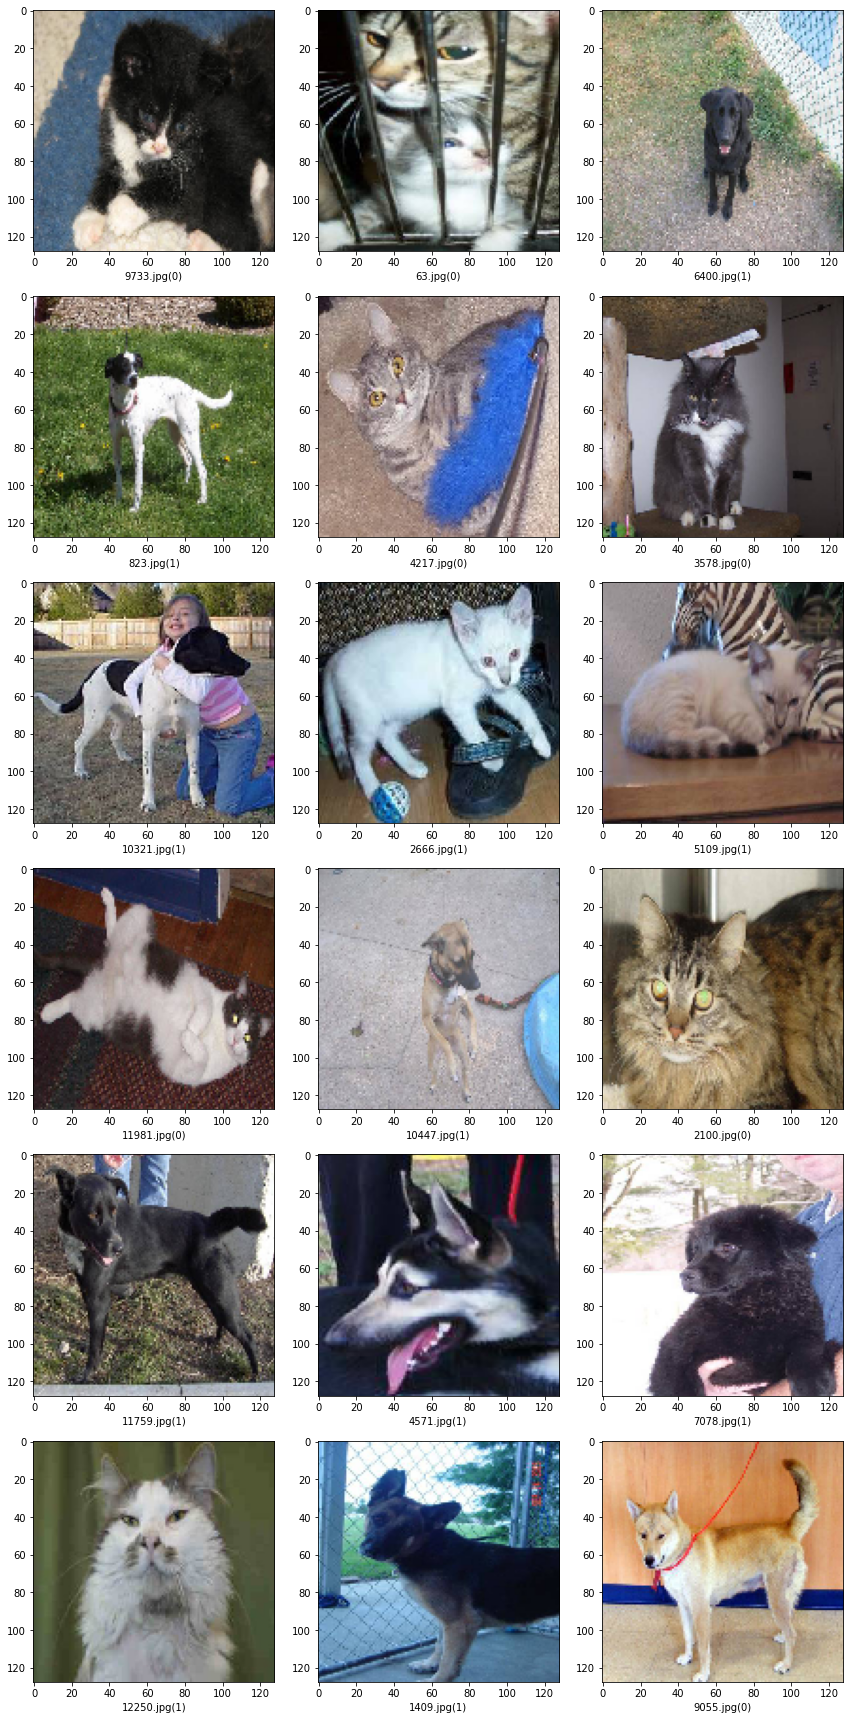

In [34]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['preds']
    img = image.load_img("./test/"+filename, target_size=(128,128))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()